## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prepare_data_function import prepare_data_flights
import warnings
warnings.filterwarnings("ignore")

In [5]:
df_flights_sample = pd.read_csv("/Users/hugo/Library/CloudStorage/OneDrive-Personal/DATA_Science/Bootcamp/W7/mid-term-project-I/data/raw/flights_sample.csv")



In [6]:
#replaced with prepare_data_function.py

In [7]:
df_flights_clean = prepare_data_flights(df_flights_sample)
df_flights_clean

,FlightDate,UniqueMarketingCarrierCode,UniqueScheduledOperatingCarrierCode,TailNumber,FlightNumber,OriginIATA,DestinationIATA,DepartureTime,ActualDeparture,Delay_Departure,...,first_dep_time,total_add_gtime,longest_add_gtime,OriginCity,OriginState,DestinationCity,DestinationState,FlightDay,FlightMonth,FlightYear
0,2018-06-22,DL,DL,N958DL,2718,ATL,BHM,09:58,00:07,209.0,...,NaN,NaN,NaN,Atlanta,GA,Birmingham,AL,22,6,2018
1,2018-04-03,AA,OO,N908EV,3261,ORD,FWA,06:49,06:51,2.0,...,NaN,NaN,NaN,Chicago,IL,Fort Wayne,IN,3,4,2018
2,2019-11-24,DL,DL,N931DN,2293,ATL,ELP,08:38,08:35,-3.0,...,NaN,NaN,NaN,Atlanta,GA,El Paso,TX,24,11,2019
3,2018-01-24,DL,YX,N216JQ,6155,LGA,DCA,06:00,05:13,-7.0,...,NaN,NaN,NaN,New York,NY,Washington,DC,24,1,2018
4,2018-09-23,HA,HA,N490HA,229,KOA,OGG,17:00,16:49,-11.0,...,NaN,NaN,NaN,Kona,HI,Kahului,HI,23,9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-05-10,DL,OO,N8923A,4698,ILM,ATL,18:25,18:57,32.0,...,NaN,NaN,NaN,Wilmington,NC,Atlanta,GA,10,5,2018
99996,2019-10-28,F9,F9,N351FR,778,LAS,DEN,15:22,15:14,-8.0,...,NaN,NaN,NaN,Las Vegas,NV,Denver,CO,28,10,2019
99997,2019-10-01,DL,DL,N923AT,1958,ATL,ORD,01:33,01:28,-5.0,...,NaN,NaN,NaN,Atlanta,GA,Chicago,IL,1,10,2019
99998,2018-10-15,UA,UA,N26215,2144,DEN,FSD,05:05,08:29,124.0,...,NaN,NaN,NaN,Denver,CO,Sioux Falls,SD,15,10,2018


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

> - This data exploration is located on the notebook [1_exploratory_Task3_weather](1_exploratory_Task3_weather.ipynb)

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [8]:
#Get data related to taxi times
df_taxi = df_flights_clean[['FlightDate','DepartureTime','taxi_out','taxi_in','ArrivalTime','OriginCity']]
df_taxi[['hourD','minD']] = df_taxi['DepartureTime'].str.split(':', expand=True)
df_taxi[['hourA','minA']] = df_taxi['ArrivalTime'].str.split(':', expand=True)

df_taxi['hourD'] = pd.to_numeric(df_taxi['hourD'])
df_taxi['hourA'] = pd.to_numeric(df_taxi['hourA'])


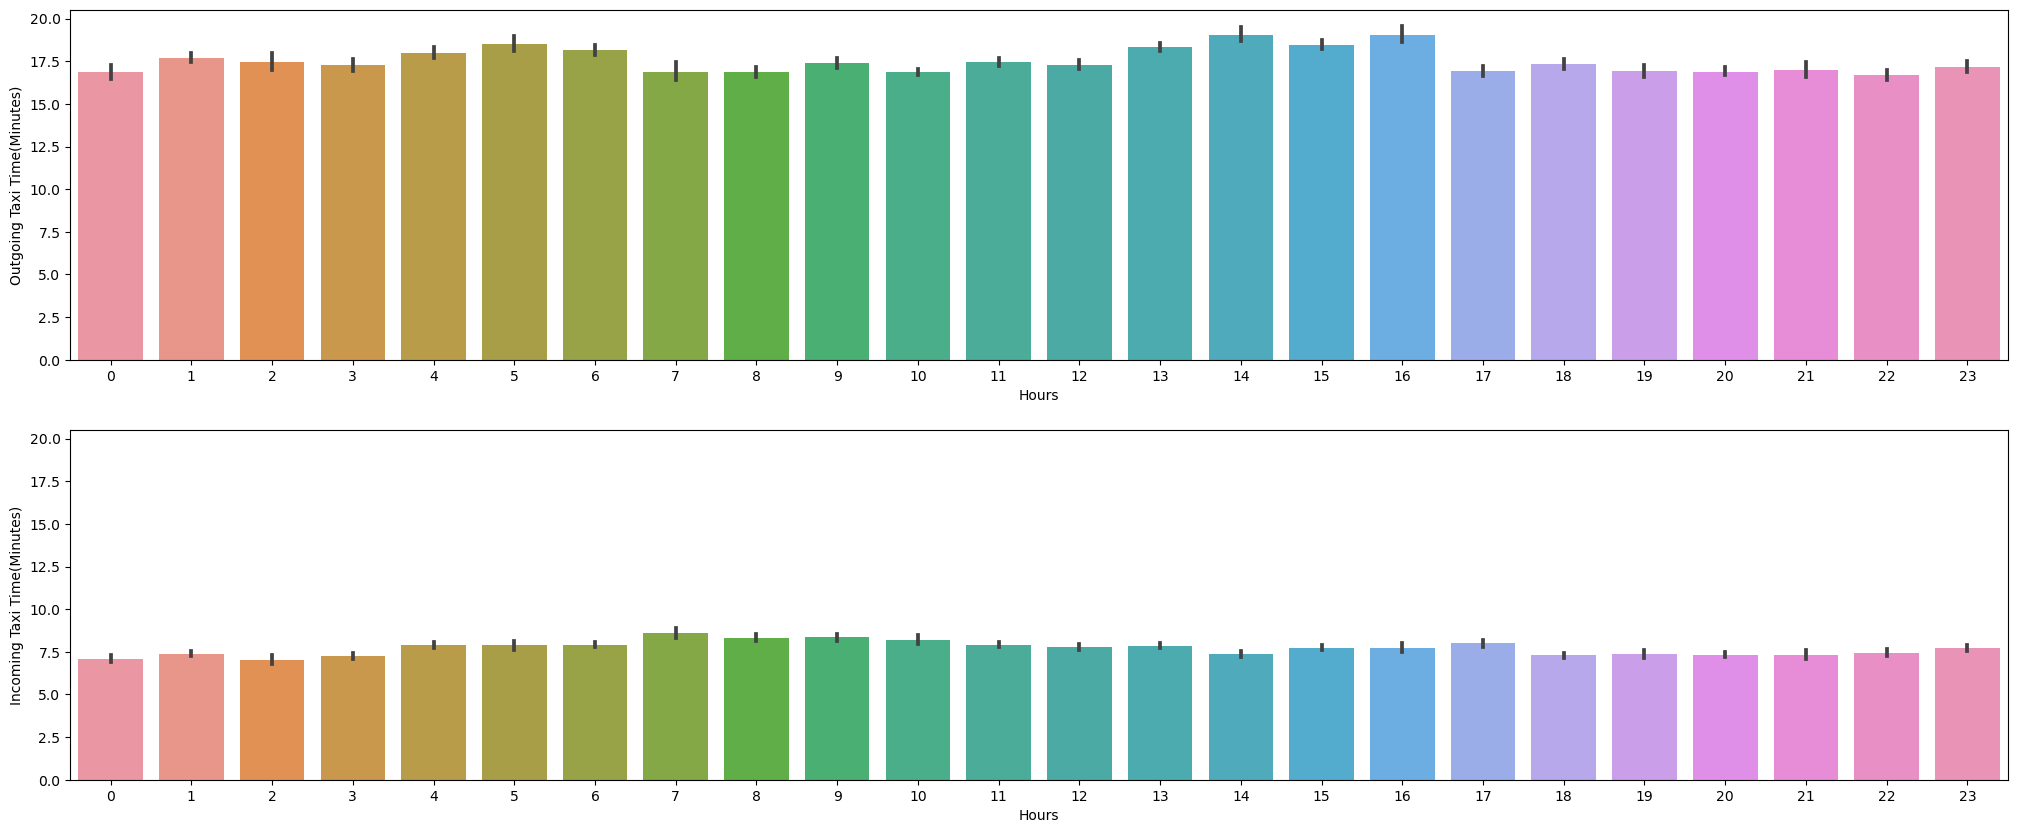

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(25, 10), sharey=True)

sns.barplot(x='hourD', y='taxi_out', data=df_taxi, ax=ax[0])#,ax.set(xlabel='common xlabel', ylabel='common ylabel' )
#ax[0].set_yscale('log')
ax[0].set(xlabel='Hours', ylabel='Outgoing Taxi Time(Minutes)')


#df_taxi.sort_values('hourA', ascending=True)
sns.barplot(x='hourA', y='taxi_in', data=df_taxi, ax=ax[1])
#ax[1].set_yscale('log')
ax[1].set(xlabel='Hours', ylabel='Incoming Taxi Time(Minutes)')
plt.show()




In [10]:
# Taxi time vs flights
df_taxi_calc = df_taxi[['taxi_out','hourD']]
df_taxi_calc['FlightIndicator'] = 'F'
df_time_taxi_departures = df_taxi_calc.groupby(['hourD','taxi_out']).count().reset_index()

df_time_taxi_departures_f = df_time_taxi_departures.groupby(['hourD']).sum().reset_index()
df_time_taxi_departures_f.sort_values(by=['taxi_out'], ascending=False)

,hourD,taxi_out,FlightIndicator
1,1,4785.0,6094
6,6,4453.0,5558
4,4,4180.0,4038
8,8,4147.0,5018
5,5,3965.0,2373
3,3,3816.0,3696
20,20,3728.0,6158
10,10,3704.0,8464
23,23,3599.0,4042
9,9,3497.0,4321


- It looks like that a higher traffic leads to higher taxi time, but in some data points it doesn't show a clear relationship.

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [11]:
df_flights_speed = df_flights_clean[['DistanceAirports','FlightTime','Delay_Departure']]
df_flights_speed = df_flights_speed[df_flights_speed.FlightTime != 0] #To avoid division by zero and exclude non applicable data
df_flights_speed['Late'] = df_flights_clean['Delay_Departure'].apply(lambda X: 'True' if X > 0 else 'False')
#use speed formula distancia divided by time
df_flights_speed['Speed'] = df_flights_clean['DistanceAirports'] / df_flights_clean['FlightTime']
df_flights_speed = df_flights_speed.dropna()
df_flights_speed

,DistanceAirports,FlightTime,Delay_Departure,Late,Speed
0,134,26.0,209.0,True,5.153846
1,157,30.0,2.0,True,5.233333
2,1282,180.0,-3.0,False,7.122222
3,214,44.0,-7.0,False,4.863636
4,84,18.0,-11.0,False,4.666667
...,...,...,...,...,...
99995,377,65.0,32.0,True,5.800000
99996,628,88.0,-8.0,False,7.136364
99997,606,99.0,-5.0,False,6.121212
99998,483,71.0,124.0,True,6.802817


In [12]:
df_flights_speed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97988 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DistanceAirports  97988 non-null  int64  
 1   FlightTime        97988 non-null  float64
 2   Delay_Departure   97988 non-null  float64
 3   Late              97988 non-null  object 
 4   Speed             97988 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.5+ MB


In [13]:
sr_mean = df_flights_speed.groupby("Late")["Speed"].mean()
sr_mean

Late
False    6.601106
True     6.756614
Name: Speed, dtype: float64

In [14]:
mean_cal = abs(sr_mean[0]- sr_mean[1])
mean_cal

0.15550776987368753

In [15]:
df_flights_speed

,DistanceAirports,FlightTime,Delay_Departure,Late,Speed
0,134,26.0,209.0,True,5.153846
1,157,30.0,2.0,True,5.233333
2,1282,180.0,-3.0,False,7.122222
3,214,44.0,-7.0,False,4.863636
4,84,18.0,-11.0,False,4.666667
...,...,...,...,...,...
99995,377,65.0,32.0,True,5.800000
99996,628,88.0,-8.0,False,7.136364
99997,606,99.0,-5.0,False,6.121212
99998,483,71.0,124.0,True,6.802817


In [16]:
df_late_flights = df_flights_speed[df_flights_speed['Late'] == 'True']
df_nolate_flights = df_flights_speed[df_flights_speed['Late'] == 'False']

In [17]:
df_speed_late = df_late_flights['Speed']
df_speed_nolate = df_nolate_flights['Speed']

In [18]:
df_speed_late

0        5.153846
1        5.233333
11       5.444444
12       5.235294
21       8.403974
           ...   
99992    7.615385
99994    7.539823
99995    5.800000
99998    6.802817
99999    6.685714
Name: Speed, Length: 33328, dtype: float64

In [19]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(df_speed_late,df_speed_nolate)


(18.663988267035272, 9.719853766413975e-78)

> Since p is less than 0.05 we can reject the null hypotesys

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [20]:
def haul_times(df):
    #short <=2 hours
    #Medium between 2 and 4
    #Long > 4
    result = df
    result['HaulType'] = df['FlightTime'].apply(lambda X: 'Short' if X <=120 else ('Medium' if X < 240 else 'Long'))
    return result

In [21]:
df_flights_sample.head()

,FlightDate,UniqueMarketingCarrierCode,UniqueScheduledOperatingCarrierCode,TailNumber,FlightNumber,OriginIATA,DestinationIATA,DepartureTime,ActualDeparture,Delay_Departure,...,first_dep_time,total_add_gtime,longest_add_gtime,OriginCity,OriginState,DestinationCity,DestinationState,FlightDay,FlightMonth,FlightYear
0,2018-06-22,DL,DL,N958DL,2718,ATL,BHM,09:58,00:07,209.0,...,NaN,NaN,NaN,Atlanta,GA,Birmingham,AL,22,6,2018
1,2018-04-03,AA,OO,N908EV,3261,ORD,FWA,06:49,06:51,2.0,...,NaN,NaN,NaN,Chicago,IL,Fort Wayne,IN,3,4,2018
2,2019-11-24,DL,DL,N931DN,2293,ATL,ELP,08:38,08:35,-3.0,...,NaN,NaN,NaN,Atlanta,GA,El Paso,TX,24,11,2019
3,2018-01-24,DL,YX,N216JQ,6155,LGA,DCA,06:00,05:13,-7.0,...,NaN,NaN,NaN,New York,NY,Washington,DC,24,1,2018
4,2018-09-23,HA,HA,N490HA,229,KOA,OGG,17:00,16:49,-11.0,...,NaN,NaN,NaN,Kona,HI,Kahului,HI,23,9,2018


In [22]:
df_haul_data = df_flights_clean[['FlightTime','ActualDeparture']]
df_haul_data = df_haul_data.dropna()

In [23]:
df_haul_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98017 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FlightTime       98017 non-null  float64
 1   ActualDeparture  98017 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [24]:
df_haul_data[['hour','min']] = df_haul_data['ActualDeparture'].str.split(':', expand=True)
df_haul_data['hour'] = pd.to_numeric(df_haul_data['hour'])
df_haul_data = df_haul_data.astype({'hour':'int'})
df_haul_data

,FlightTime,ActualDeparture,hour,min
0,26.0,00:07,0,07
1,30.0,06:51,6,51
2,180.0,08:35,8,35
3,44.0,05:13,5,13
4,18.0,16:49,16,49
...,...,...,...,...
99995,65.0,18:57,18,57
99996,88.0,15:14,15,14
99997,99.0,01:28,1,28
99998,71.0,08:29,8,29


In [25]:
df_haul_processed = haul_times(df_haul_data)
df_haul_processed 
#df_taxi[['hourD','minD']] = df_taxi['DepartureTime'].str.split(':', expand=True)

#df_haul_data

,FlightTime,ActualDeparture,hour,min,HaulType
0,26.0,00:07,0,07,Short
1,30.0,06:51,6,51,Short
2,180.0,08:35,8,35,Medium
3,44.0,05:13,5,13,Short
4,18.0,16:49,16,49,Short
...,...,...,...,...,...
99995,65.0,18:57,18,57,Short
99996,88.0,15:14,15,14,Short
99997,99.0,01:28,1,28,Short
99998,71.0,08:29,8,29,Short


In [26]:
#Hour with most Short haul takeoff
df_haul_short = df_haul_processed[df_haul_processed['HaulType'] == 'Short']
df_haul_short = df_haul_short[['hour','HaulType']].groupby(['hour']).count()
df_haul_short.nlargest(1,'HaulType')

,HaulType
hour,
10,4831


In [27]:
#Hour with most Medium haul takeoff
df_haul_medium = df_haul_processed[df_haul_processed['HaulType'] == 'Medium']
df_haul_medium = df_haul_medium[['hour','HaulType']].groupby(['hour']).count()
df_haul_medium.nlargest(1,'HaulType')

,HaulType
hour,
10,2157


In [28]:
#Hour with most Long haul takeoff
df_haul_long = df_haul_processed[df_haul_processed['HaulType'] == 'Long']
df_haul_long = df_haul_long[['hour','HaulType']].groupby(['hour']).count()
df_haul_long.nlargest(1,'HaulType')


,HaulType
hour,
13,601


- Graphs with all the Haul Types by hours

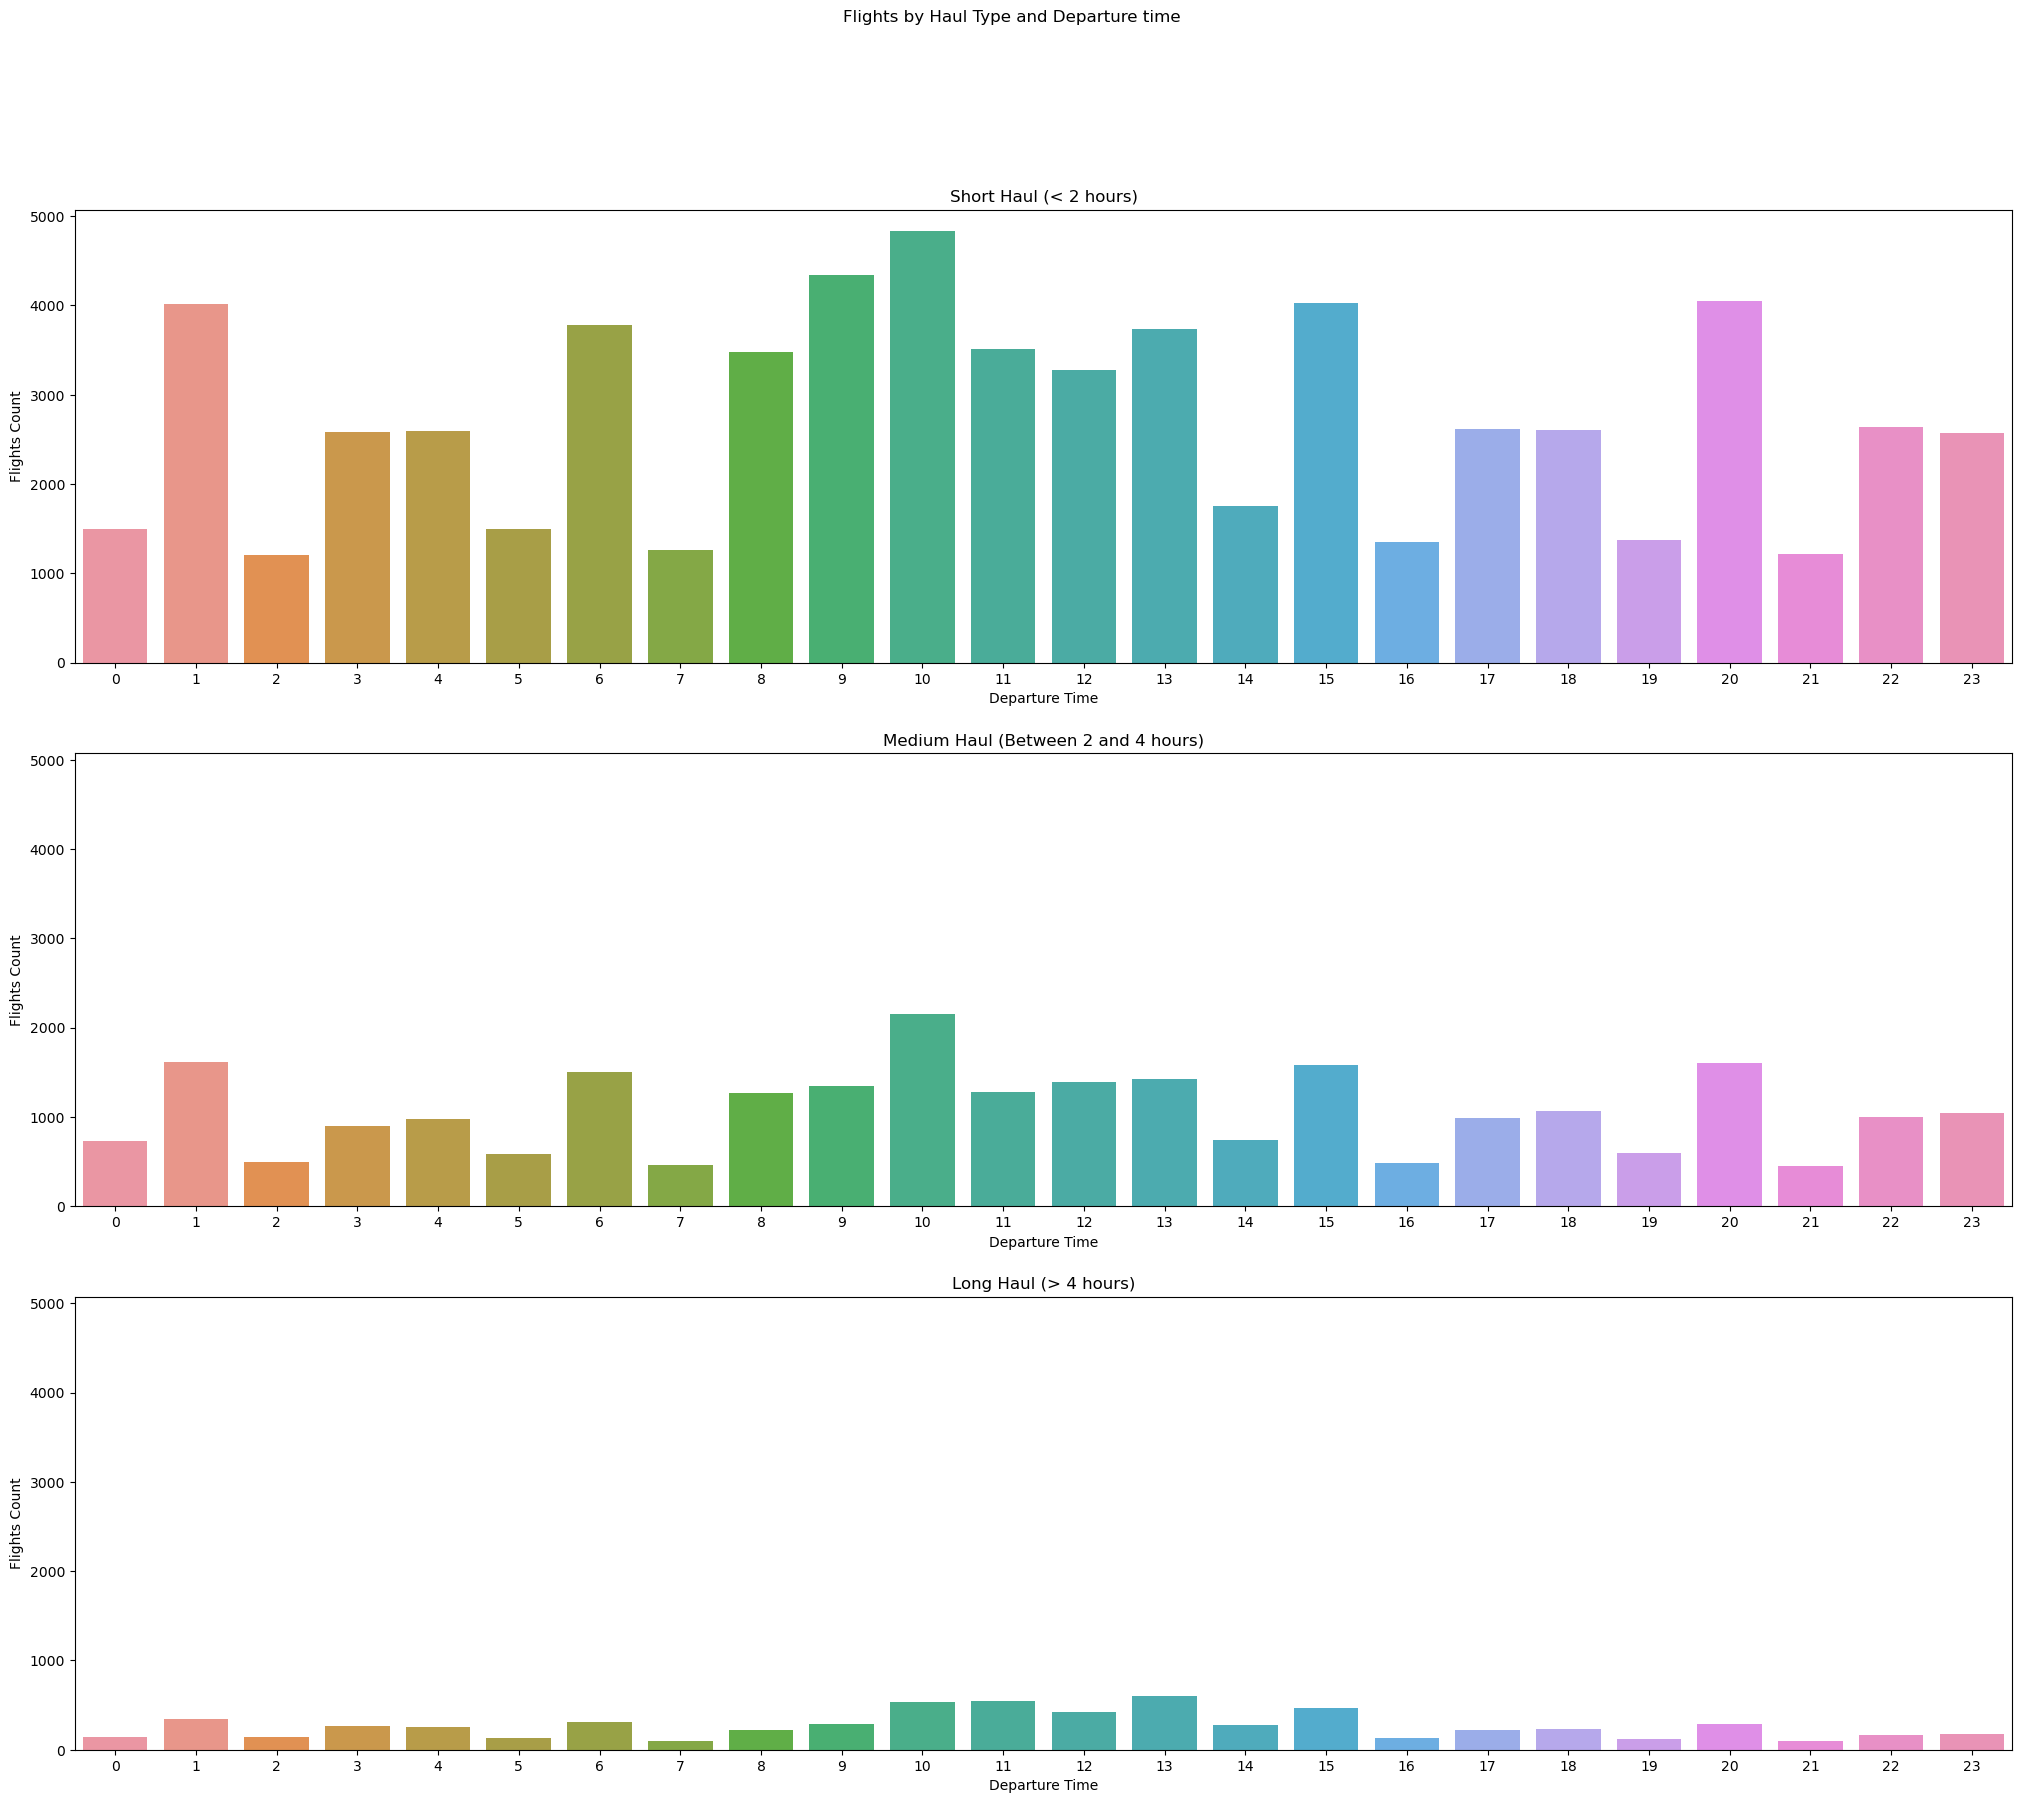

In [29]:
fig, ax = plt.subplots(3, 1, figsize=(25, 20), sharey=True)
fig.suptitle('Flights by Haul Type and Departure time')

sns.countplot(x='hour', data= df_haul_processed[df_haul_processed['HaulType'] == 'Short'] , ax=ax[0])
ax[0].set(xlabel='Departure Time', ylabel='Flights Count')
ax[0].set_title('Short Haul (< 2 hours)')
sns.countplot(x='hour', data= df_haul_processed[df_haul_processed['HaulType'] == 'Medium'] , ax=ax[1])
ax[1].set(xlabel='Departure Time', ylabel='Flights Count')
ax[1].set_title('Medium Haul (Between 2 and 4 hours)')
sns.countplot(x='hour', data= df_haul_processed[df_haul_processed['HaulType'] == 'Long'] , ax=ax[2])
ax[2].set(xlabel='Departure Time', ylabel='Flights Count')
ax[2].set_title('Long Haul (> 4 hours)')

    #short <=2 hours
    #Medium between 2 and 4
    #Long > 4
plt.show()

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [30]:
df_flights_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   FlightDate                           100000 non-null  datetime64[ns]
 1   UniqueMarketingCarrierCode           100000 non-null  object        
 2   UniqueScheduledOperatingCarrierCode  100000 non-null  object        
 3   TailNumber                           99664 non-null   object        
 4   FlightNumber                         100000 non-null  int64         
 5   OriginIATA                           100000 non-null  object        
 6   DestinationIATA                      100000 non-null  object        
 7   DepartureTime                        100000 non-null  object        
 8   ActualDeparture                      98387 non-null   object        
 9   Delay_Departure                      98356 non-null   float64       
 1

In [31]:
df_delays_flights = df_flights_clean[['UniqueMarketingCarrierCode','FlightDate','Delay_Departure','DistanceAirports' ,'FlightMonth','FlightYear']]

df_delays_flights = df_delays_flights.dropna()

df_delays_flights

,UniqueMarketingCarrierCode,FlightDate,Delay_Departure,DistanceAirports,FlightMonth,FlightYear
0,DL,2018-06-22,209.0,134,6,2018
1,AA,2018-04-03,2.0,157,4,2018
2,DL,2019-11-24,-3.0,1282,11,2019
3,DL,2018-01-24,-7.0,214,1,2018
4,HA,2018-09-23,-11.0,84,9,2018
...,...,...,...,...,...,...
99995,DL,2018-05-10,32.0,377,5,2018
99996,F9,2019-10-28,-8.0,628,10,2019
99997,DL,2019-10-01,-5.0,606,10,2019
99998,UA,2018-10-15,124.0,483,10,2018


In [32]:
# = df_delays_flights[['UniqueMarketingCarrierCode','FlightMonth','FlightYear']].groupby(['Delay_Departure']).sum()
df_sum_monthly_delay = df_delays_flights.groupby(['UniqueMarketingCarrierCode','FlightYear','FlightMonth'], group_keys=False).sum()
df_sum_monthly_delay

df_sum_monthly = df_sum_monthly_delay.index.to_frame().join(df_sum_monthly_delay)
df_sum_monthly = df_sum_monthly.reset_index(level=0, drop=True)
df_sum_monthly = df_sum_monthly.reset_index(level=0, drop=True)
df_sum_monthly = df_sum_monthly.reset_index(level=0, drop=True)
df_sum_monthly

,UniqueMarketingCarrierCode,FlightYear,FlightMonth,Delay_Departure,DistanceAirports
0,AA,2018,1,10335.0,699310
1,AA,2018,2,10219.0,650011
2,AA,2018,3,4184.0,731911
3,AA,2018,4,6129.0,663704
4,AA,2018,5,12456.0,750173
...,...,...,...,...,...
238,WN,2019,8,7742.0,486001
239,WN,2019,9,4368.0,533726
240,WN,2019,10,6348.0,508397
241,WN,2019,11,5706.0,534127


In [33]:
df_sum_monthly.rename(columns={'UniqueMarketingCarrierCode': 'AirlineCode'}, inplace=True) 
#df.rename(columns={'dep_delay': 'Delay_Departure'}, inplace=True)  
df_sum_monthly
    

,AirlineCode,FlightYear,FlightMonth,Delay_Departure,DistanceAirports
0,AA,2018,1,10335.0,699310
1,AA,2018,2,10219.0,650011
2,AA,2018,3,4184.0,731911
3,AA,2018,4,6129.0,663704
4,AA,2018,5,12456.0,750173
...,...,...,...,...,...
238,WN,2019,8,7742.0,486001
239,WN,2019,9,4368.0,533726
240,WN,2019,10,6348.0,508397
241,WN,2019,11,5706.0,534127


- Monthly delay by Carrier

In [34]:
df_sum_montly_delays=df_sum_monthly[['AirlineCode','FlightYear','FlightMonth','Delay_Departure']]
df_sum_montly_delays

,AirlineCode,FlightYear,FlightMonth,Delay_Departure
0,AA,2018,1,10335.0
1,AA,2018,2,10219.0
2,AA,2018,3,4184.0
3,AA,2018,4,6129.0
4,AA,2018,5,12456.0
...,...,...,...,...
238,WN,2019,8,7742.0
239,WN,2019,9,4368.0
240,WN,2019,10,6348.0
241,WN,2019,11,5706.0


- Montly distance by carrier

In [35]:

df_sum_montly_distance =df_sum_monthly[['AirlineCode','FlightYear','FlightMonth','DistanceAirports']]
df_sum_montly_distance

,AirlineCode,FlightYear,FlightMonth,DistanceAirports
0,AA,2018,1,699310
1,AA,2018,2,650011
2,AA,2018,3,731911
3,AA,2018,4,663704
4,AA,2018,5,750173
...,...,...,...,...
238,WN,2019,8,486001
239,WN,2019,9,533726
240,WN,2019,10,508397
241,WN,2019,11,534127


- Passengers carried by different airlines


In [36]:
df_passengers = pd.read_csv("/Users/hugo/Library/CloudStorage/OneDrive-Personal/DATA_Science/Bootcamp/W7/mid-term-project-I/data/raw/passengersSample.csv")
df_passengers

,seats,passengers,distance,unique_carrier,year,month,class
0,9,0,176,GV,2018,9,F
1,6,3,24,K2,2019,10,L
2,160,85,1430,AA,2018,11,F
3,9,2,128,5V,2019,11,L
4,4004,3484,999,WN,2018,8,F
...,...,...,...,...,...,...,...
99995,3900,3635,599,AA,2019,8,F
99996,669,625,4101,DL,2018,9,F
99997,173,0,2095,GL,2019,9,L
99998,9858,8825,2381,B6,2019,5,F


In [37]:
df_passengers_total = df_passengers[['unique_carrier','passengers']]
# df_delays_flights.groupby(['UniqueMarketingCarrierCode','FlightYear','FlightMonth'], group_keys=False).sum()
#df_sum_monthly_delay
df_passengers_total= df_passengers_total[df_passengers_total['passengers'] != 0]
df_passengers_total.rename(columns={'unique_carrier': 'AirlineCode'}, inplace=True) 
df_passengers_total

,AirlineCode,passengers
1,K2,3
2,AA,85
3,5V,2
4,WN,3484
6,UA,3499
...,...,...
99992,0CQ,1
99995,AA,3635
99996,DL,625
99998,B6,8825


In [38]:
df_sum_passengers_airline = df_passengers_total.groupby(['AirlineCode']).sum().reset_index()
#df_sum_passengers_airline = df_sum_passengers_airline.index.to_frame().join(df_sum_passengers_airline)
df_sum_passengers_airline.sort_values(by=['passengers'], ascending=False) 

,AirlineCode,passengers
259,WN,35217616
79,AA,32784968
118,DL,32553519
243,UA,23883750
97,B6,8799146
...,...,...
9,0UQ,4
260,WRD,4
223,RVQ,4
11,10Q,2


- Total fuel comsumption per air carrier.

In [39]:
df_fuel  = pd.read_csv("/Users/hugo/Library/CloudStorage/OneDrive-Personal/DATA_Science/Bootcamp/W7/mid-term-project-I/data/raw/fuel_comsumption.csv")
df_fuel_comsumption = df_fuel[['unique_carrier','carrier_name','total_gallons','total_cost']]
df_fuel_comsumption.dropna()
df_fuel_comsumption

,unique_carrier,carrier_name,total_gallons,total_cost
0,09Q,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",1235210.0,3449957
1,0WQ,Avjet Corporation,0.0,0
2,1BQ,"Eastern Airlines f/k/a Dynamic Airways, LLC",60821.0,176988
3,27Q,"Jet Aviation Flight Services, Inc.",0.0,0
4,2HQ,Elite Airways LLC,410186.0,1518919
...,...,...,...,...
1053,X9,Omni Air International LLC,2531738.0,6172701
1054,XP,XTRA Airways,0.0,0
1055,YV,Mesa Airlines Inc.,0.0,0
1056,YX,Republic Airline,21048.0,50043


In [40]:
df_fuel_comsumption = df_fuel_comsumption[df_fuel_comsumption['total_gallons'] != 0]
df_fuel_comsumption.rename(columns={'unique_carrier': 'AirlineCode'}, inplace=True)
df_fuel_comsumption.rename(columns={'carrier_name': 'AirlineName'}, inplace=True)
df_fuel_comsumption

,AirlineCode,AirlineName,total_gallons,total_cost
0,09Q,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",1235210.0,3449957
2,1BQ,"Eastern Airlines f/k/a Dynamic Airways, LLC",60821.0,176988
4,2HQ,Elite Airways LLC,410186.0,1518919
6,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,304851.0,792440
7,5X,United Parcel Service,73210000.0,133562000
...,...,...,...,...
1051,WI,Sky Lease Cargo,788547.0,1793535
1052,WL,"Caribbean Sun Airlines, Inc. d/b/a World Atlan...",64970.0,168103
1053,X9,Omni Air International LLC,2531738.0,6172701
1056,YX,Republic Airline,21048.0,50043


In [41]:
df_fuel_comsumption_carrier = df_fuel_comsumption.groupby(['AirlineCode']).sum().reset_index()

#df_sum_passengers_airline = df_sum_passengers_airline.index.to_frame().join(df_sum_passengers_airline)
df_fuel_comsumption_carrier.sort_values(by=['total_gallons'], ascending=False) 

,AirlineCode,total_gallons,total_cost
9,AA,6.416096e+09,13069982821
13,DL,6.310645e+09,13415228189
34,UA,6.123717e+09,12627729183
37,WN,3.648209e+09,7489788379
15,FX,2.075059e+09,4248786486
5,5X,1.523490e+09,3115165000
12,B6,1.515474e+09,3291672014
11,AS,1.275982e+09,2878694746
6,5Y,9.677969e+08,2125488689
28,NK,7.666939e+08,1687812540
